## __Import__

In [ ]:
import sys
import os
import pandas as pd
import numpy as np
from ast import literal_eval
from mplsoccer import Pitch, VerticalPitch, Standardizer


# Run the notebook from inside the notebooks folder
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__name__), '..')))

from scripts.dataloader import Dataloader

dataloader = Dataloader()
df = dataloader.get_dimension(dimension="possession")
df.columns


# Setting types
def convert_to_list(input_data):
    if(isinstance(input_data, str)):
        try:
            return literal_eval(input_data)
        except (ValueError, SyntaxError):
            print(f"Error: The string {input_data} could not be converted to a list.")
            return None
    
    return input_data
    
df["location"] = df["location"].apply(convert_to_list)
df["carry_end_location"] = df["carry_end_location"].apply(convert_to_list)
df[["x", "y"]] = df["location"].apply(pd.Series)
df[["x_end_carry", "y_end_carry"]] = df["carry_end_location"].apply(pd.Series)

df["under_pressure"] = df['under_pressure'].fillna(False)
df

[2025-03-27 20:22:58] Loading data form local file system


In [43]:
df_standard_stats = pd.read_csv("../data/standard_stats.csv")
df_combined = pd.merge(left=df,right=df_standard_stats,on="player",how="left")   
df_combined[["player","match_played","position","positions_played"]]

,player,match_played,position,positions_played
0,Mark Uth,25.0,Forward,"['Right Attacking Midfield', 'Right Wing', 'Ri..."
1,Andrej Kramarić,15.0,Forward,"['Center Forward', 'Left Center Forward', 'Cen..."
2,Sebastian Rudy,24.0,Midfielder,"['Left Defensive Midfield', 'Right Center Midf..."
3,Fabian Lukas Schär,24.0,Defender,"['Right Center Back', 'Right Center Back', 'Ri..."
4,Tobias Strobl,26.0,Midfielder,"['Left Center Back', 'Left Back', 'Left Center..."
...,...,...,...,...
929860,Douglas Costa de Souza,27.0,Midfielder,"['Center Forward', 'Right Wing', 'Left Wing Ba..."
929861,Mario Götze,14.0,"Midfielder, Forward","['Right Center Midfield', 'Center Attacking Mi..."
929862,Mario Götze,14.0,"Midfielder, Forward","['Right Center Midfield', 'Center Attacking Mi..."
929863,Márcio Rafael Ferreira de Souza,25.0,Defender,"['Right Center Back', 'Right Back', 'Right Win..."


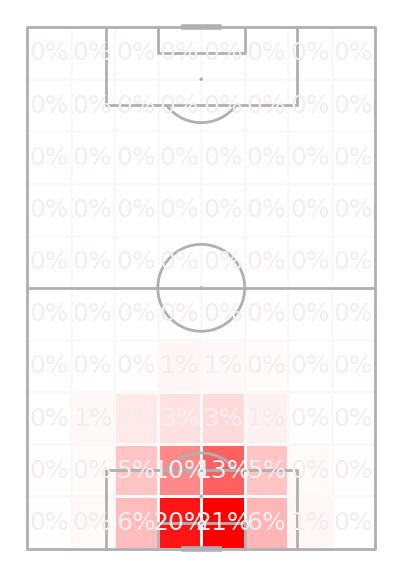

In [32]:
from matplotlib.colors import LinearSegmentedColormap

player = "Manuel Neuer"
player_a = df.loc[df["player"]==player,:]


# Create a custom colormap starting from white to red
cmap = LinearSegmentedColormap.from_list("white_to_red", ["#ffffff", "#ff0000"])
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2)
fig, ax = pitch.draw(figsize=(4.125, 6))

# Bin the player stats and normalize them
bin_statistic = pitch.bin_statistic(player_a["x"], player_a["y"], statistic='count', bins=(10, 8), normalize=True)


pitch.heatmap(bin_statistic, ax=ax, cmap=cmap, edgecolor='#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}')


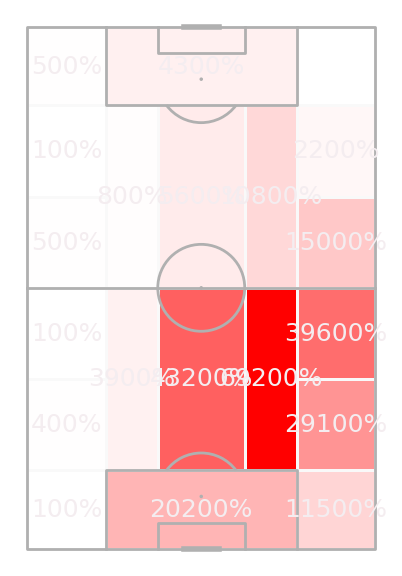

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

player = "Fabian Lukas Schär"
player_a = df.loc[df["player"]==player,:]


# Create a custom colormap starting from white to red
cmap = LinearSegmentedColormap.from_list("white_to_red", ["#ffffff", "#ff0000"])
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2)
fig, ax = pitch.draw(figsize=(4.125, 6))

# Bin the player stats and normalize them
bin_statistic = pitch.bin_statistic_positional(player_a["x"], player_a["y"], statistic='count', positional="full", normalize=True)


pitch.heatmap_positional(bin_statistic, ax=ax, cmap=cmap, edgecolor='#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=18,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}',exclude_zeros=True)


In [50]:
bin_statistic

[{'statistic': array([[0.00038895, 0.00155581, 0.00038895, 0.00194477, 0.00038895,
          0.00194477]]),
  'x_grid': array([[  0.,  18.,  39.,  60.,  81., 102., 120.],
         [  0.,  18.,  39.,  60.,  81., 102., 120.]]),
  'y_grid': array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [18., 18., 18., 18., 18., 18., 18.]]),
  'cx': array([  9. ,  28.5,  49.5,  70.5,  91.5, 111. ]),
  'cy': array([9., 9., 9., 9., 9., 9.]),
  'binnumber': None,
  'inside': None,
  'angle_grid': None,
  'angle_widths': None},
 {'statistic': array([[0.04472968, 0.11318553, 0.15402567, 0.05834306, 0.00855698,
          0.        ]]),
  'x_grid': array([[  0.,  18.,  39.,  60.,  81., 102., 120.],
         [  0.,  18.,  39.,  60.,  81., 102., 120.]]),
  'y_grid': array([[62., 62., 62., 62., 62., 62., 62.],
         [80., 80., 80., 80., 80., 80., 80.]]),
  'cx': array([  9. ,  28.5,  49.5,  70.5,  91.5, 111. ]),
  'cy': array([71., 71., 71., 71., 71., 71.]),
  'binnumber': None,
  'inside': None,
  'angle_

# Tests

<Axes: xlabel='x', ylabel='y'>

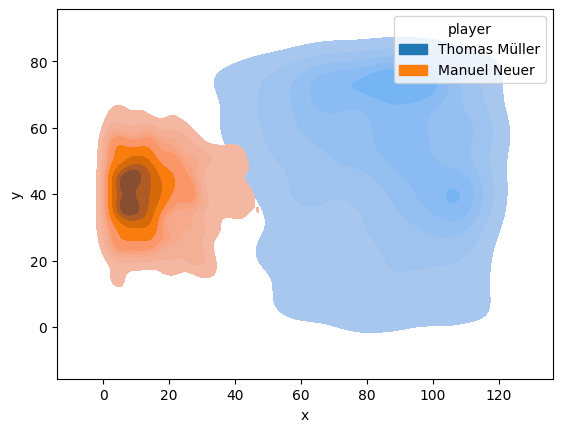

In [2]:
import seaborn as sns

player_1 = df.loc[(df["player"]=="Manuel Neuer") | (df["player"]=="Thomas Müller") ,:]
player_1
sns.kdeplot(data=player_1, x="x", y="y",  hue="player", fill=True)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Sample data
#data = np.random.normal(size=100)
data = np.stack([player_1["x"], player_1["y"]]).T
# Create a gaussian KDE object
kde = gaussian_kde(data)

# Define a grid where you want to evaluate the KDE
x_grid = np.linspace(min(data), max(data), 100)

# Evaluate the KDE on the grid
kde_values = kde.evaluate(x_grid)

# Plot the result using matplotlib
plt.plot(x_grid, kde_values, label='KDE')
plt.fill_between(x_grid, kde_values, alpha=0.5)  # Optional: Fill under the curve
plt.title('Kernel Density Estimate')
plt.xlabel('Data Points')
plt.ylabel('Density')
plt.legend()
plt.show()


ValueError: Number of dimensions is greater than number of samples. This results in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Note that `gaussian_kde` interprets each *column* of `dataset` to be a point; consider transposing the input to `dataset`.

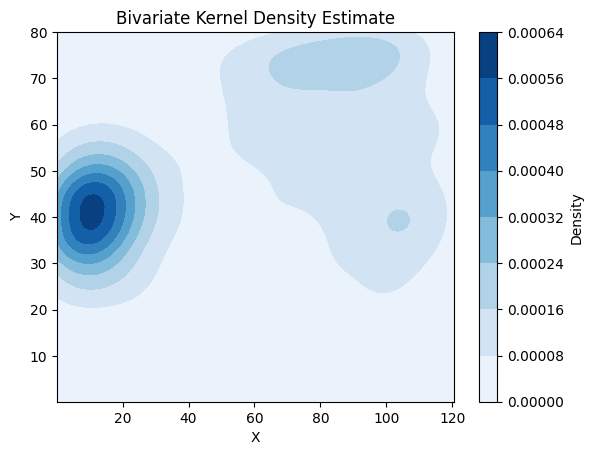

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Sample data (replace with your dataframe)
data = np.stack([player_1["x"], player_1["y"]]).T

# Create a gaussian KDE object
kde = gaussian_kde(data.T)  # Transpose the data for bivariate kde

# Define a grid to evaluate the KDE
x_grid = np.linspace(min(df["x"]), max(df["x"]), 100)
y_grid = np.linspace(min(df["y"]), max(df["y"]), 100)
X, Y = np.meshgrid(x_grid, y_grid)

# Evaluate the KDE on the grid (reshaping the meshgrid for evaluation)
grid_points = np.vstack([X.ravel(), Y.ravel()])
kde_values = kde(grid_points).reshape(X.shape)

# Plot the result using contour plot for bivariate KDE
plt.contourf(X, Y, kde_values, cmap='Blues')
plt.colorbar(label='Density')
plt.title('Bivariate Kernel Density Estimate')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
